In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 14100)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from datetime import datetime, date
import dateutil
import warnings

warnings.filterwarnings("ignore")
import plotly.express as px

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math

In [2]:
#Data Import, Preprocessing
covid_data = pd.read_csv(r"C:\Users\aruna\OneDrive\Desktop\UCD_Project_Final\UCDPA_Aruna\data.csv")
print (covid_data)

         dateRep  day  month  year    cases  deaths countriesAndTerritories geoId countryterritoryCode  popData2020 continentExp
0     14/09/2021   14      9  2021     1227       4                 Austria    AT                  AUT      8901064       Europe
1     13/09/2021   13      9  2021     1891       0                 Austria    AT                  AUT      8901064       Europe
2     12/09/2021   12      9  2021     2431       5                 Austria    AT                  AUT      8901064       Europe
3     11/09/2021   11      9  2021     2259       5                 Austria    AT                  AUT      8901064       Europe
4     10/09/2021   10      9  2021     2157       3                 Austria    AT                  AUT      8901064       Europe
5     09/09/2021    9      9  2021     2505       6                 Austria    AT                  AUT      8901064       Europe
6     08/09/2021    8      9  2021     1496       8                 Austria    AT                

In [3]:
print (covid_data.shape)   #number of rows and columns in this dataset

(5940, 11)


In [4]:
covid_data.info()         # print columns names and dataType.There's no null value in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dateRep                  5940 non-null   object
 1   day                      5940 non-null   int64 
 2   month                    5940 non-null   int64 
 3   year                     5940 non-null   int64 
 4   cases                    5940 non-null   int64 
 5   deaths                   5940 non-null   int64 
 6   countriesAndTerritories  5940 non-null   object
 7   geoId                    5940 non-null   object
 8   countryterritoryCode     5940 non-null   object
 9   popData2020              5940 non-null   int64 
 10  continentExp             5940 non-null   object
dtypes: int64(6), object(5)
memory usage: 510.6+ KB


In [3]:
#Since the dateRep is in object will convert this to datetime
covid_data["dateRep"] = pd.to_datetime(covid_data["dateRep"])
print (covid_data.dtypes)

dateRep                    datetime64[ns]
day                                 int64
month                               int64
year                                int64
cases                               int64
deaths                              int64
countriesAndTerritories            object
geoId                              object
countryterritoryCode               object
popData2020                         int64
continentExp                       object
dtype: object


In [6]:
covid_data["countriesAndTerritories"].unique()  #list of all countries in EU

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden'], dtype=object)

In [7]:
print (covid_data.describe())      #key feature in this dataset

               day        month    year         cases        deaths   popData2020
count  5940.000000  5940.000000  5940.0  5.940000e+03   5940.000000  5.940000e+03
mean     15.249832     5.751347  2021.0  6.319942e+03    128.155556  1.510301e+07
std       8.866251     1.879057     0.0  8.854174e+04   2291.967470  2.121626e+07
min       1.000000     2.000000  2021.0 -2.001000e+03     -3.000000  3.874700e+04
25%       8.000000     4.000000  2021.0  1.250000e+02      0.000000  2.095861e+06
50%      15.000000     6.000000  2021.0  5.455000e+02      4.000000  6.387122e+06
75%      23.000000     7.000000  2021.0  2.198750e+03     26.000000  1.152244e+07
max      31.000000     9.000000  2021.0  3.645305e+06  97699.000000  8.316671e+07


In [8]:
#data_date = covid_data.groupby("dateRep", as_index=False).cases.max()    #creating a dataframe to see number of cases based on the date reported
data_date = covid_data.groupby('dateRep').sum()['cases'].reset_index()
#data_date['dateRep'] = pd.to_datetime(data_date['dateRep'])


print (data_date)
# ----------------

       dateRep     cases
0   2021-01-03  19504293
1   2021-01-04    194153
2   2021-01-05     96326
3   2021-01-06     22011
4   2021-01-07     23832
5   2021-01-08     47204
6   2021-01-09     70277
7   2021-02-03    101229
8   2021-02-04    183398
9   2021-02-05     64967
10  2021-02-06     35537
11  2021-02-07     24600
12  2021-02-08     96034
13  2021-02-09     72977
14  2021-02-28   3109689
15  2021-03-03    117832
16  2021-03-04    171419
17  2021-03-05     66047
18  2021-03-06     34806
19  2021-03-07     11736
20  2021-03-08     44866
21  2021-03-09     69163
22  2021-03-13    148119
23  2021-03-14    124156
24  2021-03-15    103605
25  2021-03-16    129499
26  2021-03-17    146380
27  2021-03-18    168389
28  2021-03-19    168597
29  2021-03-20    165135
30  2021-03-21    137265
31  2021-03-22    117589
32  2021-03-23    155033
33  2021-03-24    163369
34  2021-03-25    184234
35  2021-03-26    193222
36  2021-03-27    181551
37  2021-03-28    150116
38  2021-03-29    122188


In [4]:
# finding number of Cases in EU
group_eu = covid_data.groupby('countriesAndTerritories')['cases', 'deaths'].sum().reset_index()  # Using groupby to display the sum of cases.deaths in EU
#print (group_eu)

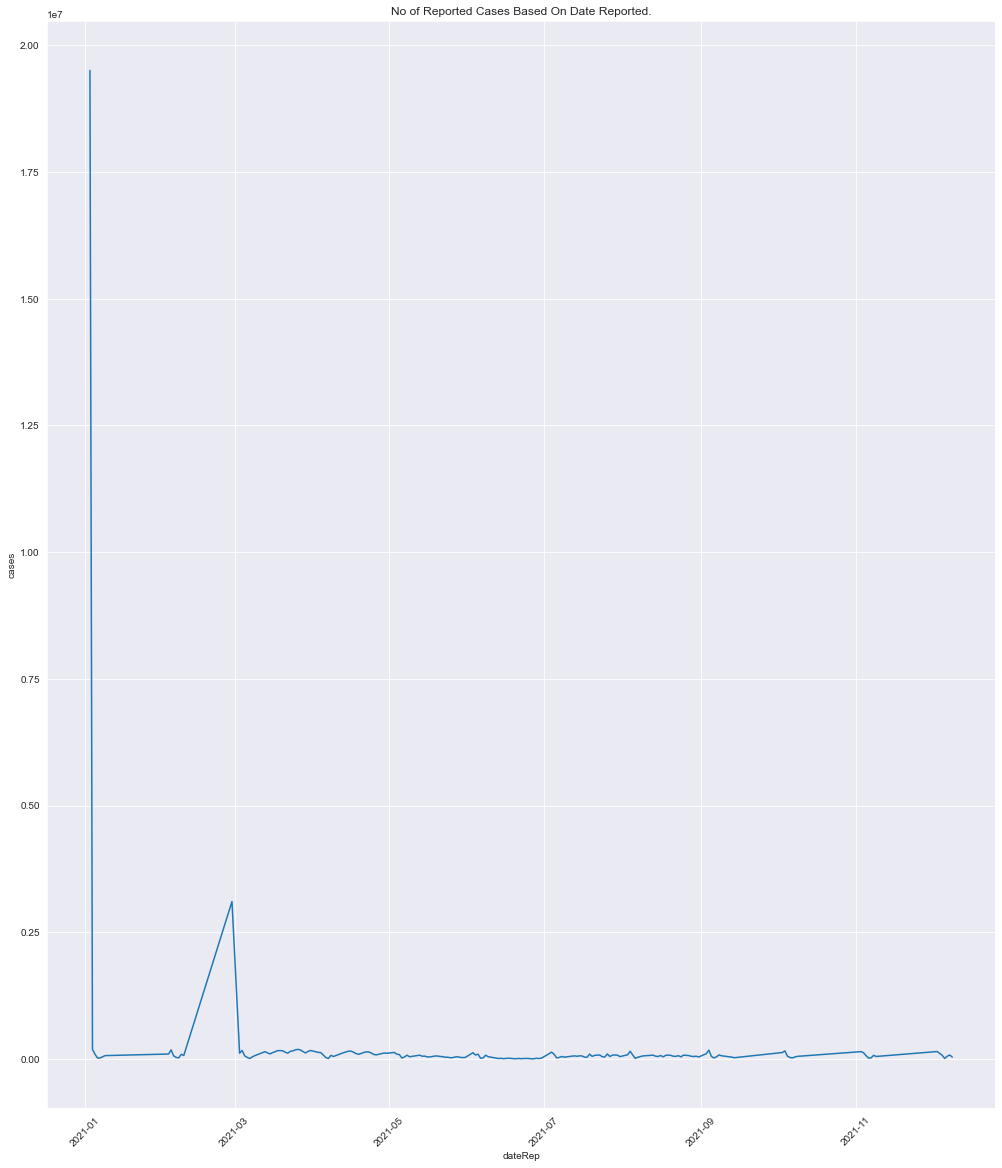

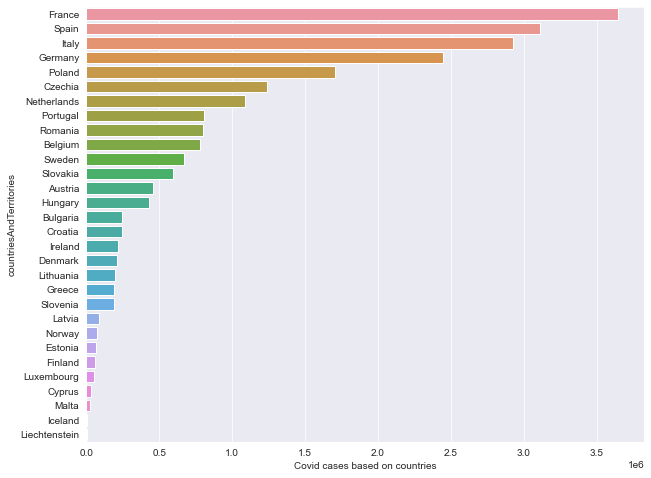

In [10]:



#Plotline cases based on date reported
plt.figure(figsize=(17,20))
sns.lineplot(x=data_date['dateRep'], y=data_date['cases'])
plt.title("No of Reported Cases Based On Date Reported.")
plt.xticks(rotation=45)

plt.show()

#Covid cases based on countries"
covid_data['cases']=covid_data.groupby('countriesAndTerritories').cases.tail(1)
x=covid_data.groupby('countriesAndTerritories')['cases'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,8))
ax=sns.barplot(x.values,x.index)
ax.set_xlabel("Covid cases based on countries")
ax.set_ylabel("countriesAndTerritories")
plt.show()








In [5]:
#Top 5 reported cases by countries
countries = covid_data.groupby('countriesAndTerritories')['cases'].max().sort_values(ascending= False)[:5].index
top_countries = pd.DataFrame(columns=covid_data.columns)
for country in countries:
  top_countries = top_countries.append(covid_data.loc[covid_data['countriesAndTerritories'] == country])
print (top_countries.sort_values(by="dateRep"))



        dateRep day month  year    cases deaths countriesAndTerritories geoId countryterritoryCode popData2020 continentExp
4751 2021-01-03   1     3  2021  1706986  43769                  Poland    PL                  POL    37958138       Europe
3167 2021-01-03   1     3  2021  2925265  97699                   Italy    IT                  ITA    59641488       Europe
2177 2021-01-03   1     3  2021  2447068  70105                 Germany    DE                  DEU    83166711       Europe
5740 2021-01-03   1     3  2021    15978    467                   Spain    ES                  ESP    47332614       Europe
1979 2021-01-03   1     3  2021  3645305  86454                  France    FR                  FRA    67320216       Europe
2146 2021-01-04   1     4  2021    24300    201                 Germany    DE                  DEU    83166711       Europe
3136 2021-01-04   1     4  2021    23887    467                   Italy    IT                  ITA    59641488       Europe
1948 202

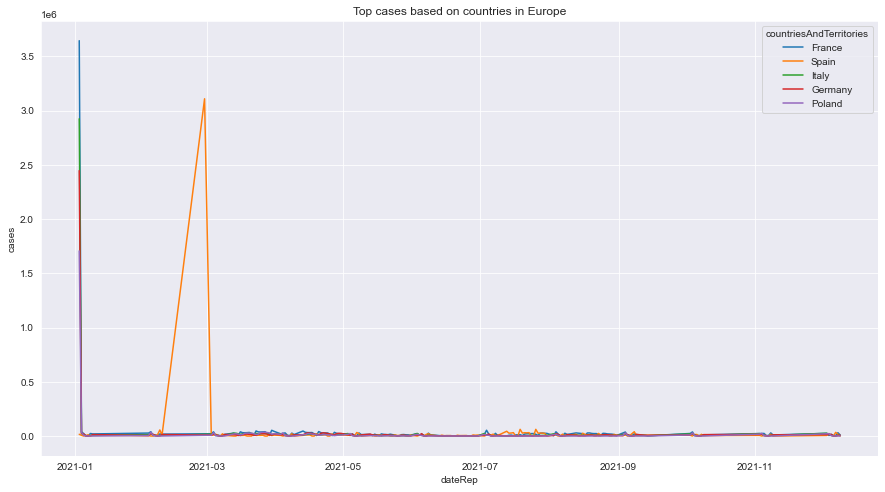

In [6]:
#using plt line to display the countries
plt.figure(figsize=(15,8))
sns.lineplot(top_countries['dateRep'],
             top_countries['cases'],
             hue = top_countries['countriesAndTerritories'], ci= False)
plt.title("Top cases based on countries in Europe");
plt.show()

In [14]:
# Map of EU - covid cases
fig = px.choropleth(group_eu, locations="countriesAndTerritories",
                    locationmode='country names', color="cases", scope='europe',
                    hover_name="countriesAndTerritories", range_color=[1,8777999],height=800, width=750,
                    color_continuous_scale="sunset",
                    title='Covid-19 Cases Reported in EU')

fig.show()


In [12]:
#data_population = covid_data.groupby("countriesAndTerritories",'popData2020')[['popData2020','cases']].sum().reset_index()
data_population= covid_data.groupby(['popData2020','countriesAndTerritories' ])['cases','deaths'].sum().reset_index()
data_population.sort_values('popData2020', ascending=True)

,popData2020,countriesAndTerritories,cases,deaths
0,38747,Liechtenstein,3390,60
1,364134,Iceland,11279,33
2,514564,Malta,36793,449
3,626108,Luxembourg,76798,834
4,888005,Cyprus,118090,532
5,1328976,Estonia,147357,1313
6,1907675,Latvia,147328,2613
7,2095861,Slovenia,277853,4797
8,2794090,Lithuania,309855,4721
9,4058165,Croatia,384082,8447


In [13]:
#Calculate Ratio Cases over Population
data_cases = covid_data.groupby("countriesAndTerritories", as_index=False).cases.sum()

ratio = data_cases["cases"]/data_population["popData2020"] * 1000
ratio

data_cases ["Ratio"] = ratio
data_cases

,countriesAndTerritories,cases,Ratio
0,Austria,707875,18269.156322
1,Belgium,1210286,3323.737965
2,Bulgaria,473270,919.749536
3,Croatia,384082,613.443687
4,Cyprus,118090,132.983485
5,Czechia,1683802,1266.992030
6,Denmark,352636,184.851193
7,Estonia,147357,70.308575
8,Finland,133851,47.905042
9,France,6907133,1702.033555


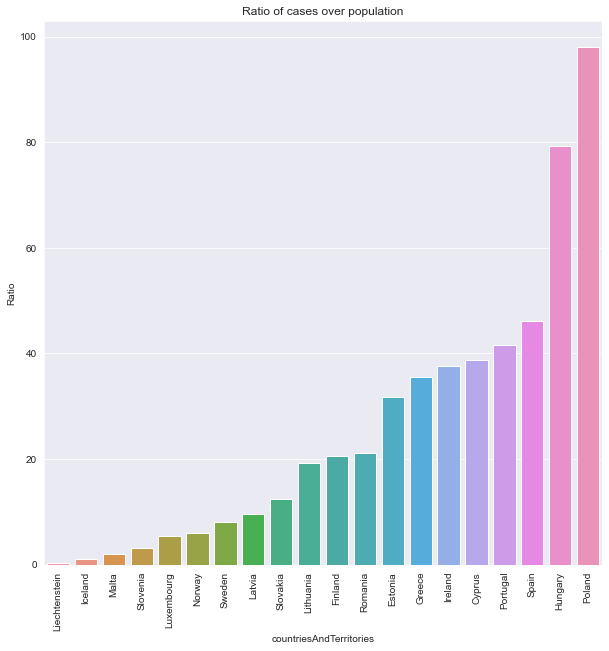

In [128]:
# Top 20 Ratio Cases over Population
data_top20 = data_cases.sort_values(by="Ratio", ascending=True)
data_top20 = data_top20.head(20)

plt.figure(figsize=(10,10))
sns.barplot(x=data_top20["countriesAndTerritories"], y=data_top20["Ratio"])
plt.title("Ratio of cases over population")
plt.xticks(rotation=90)
plt.show()

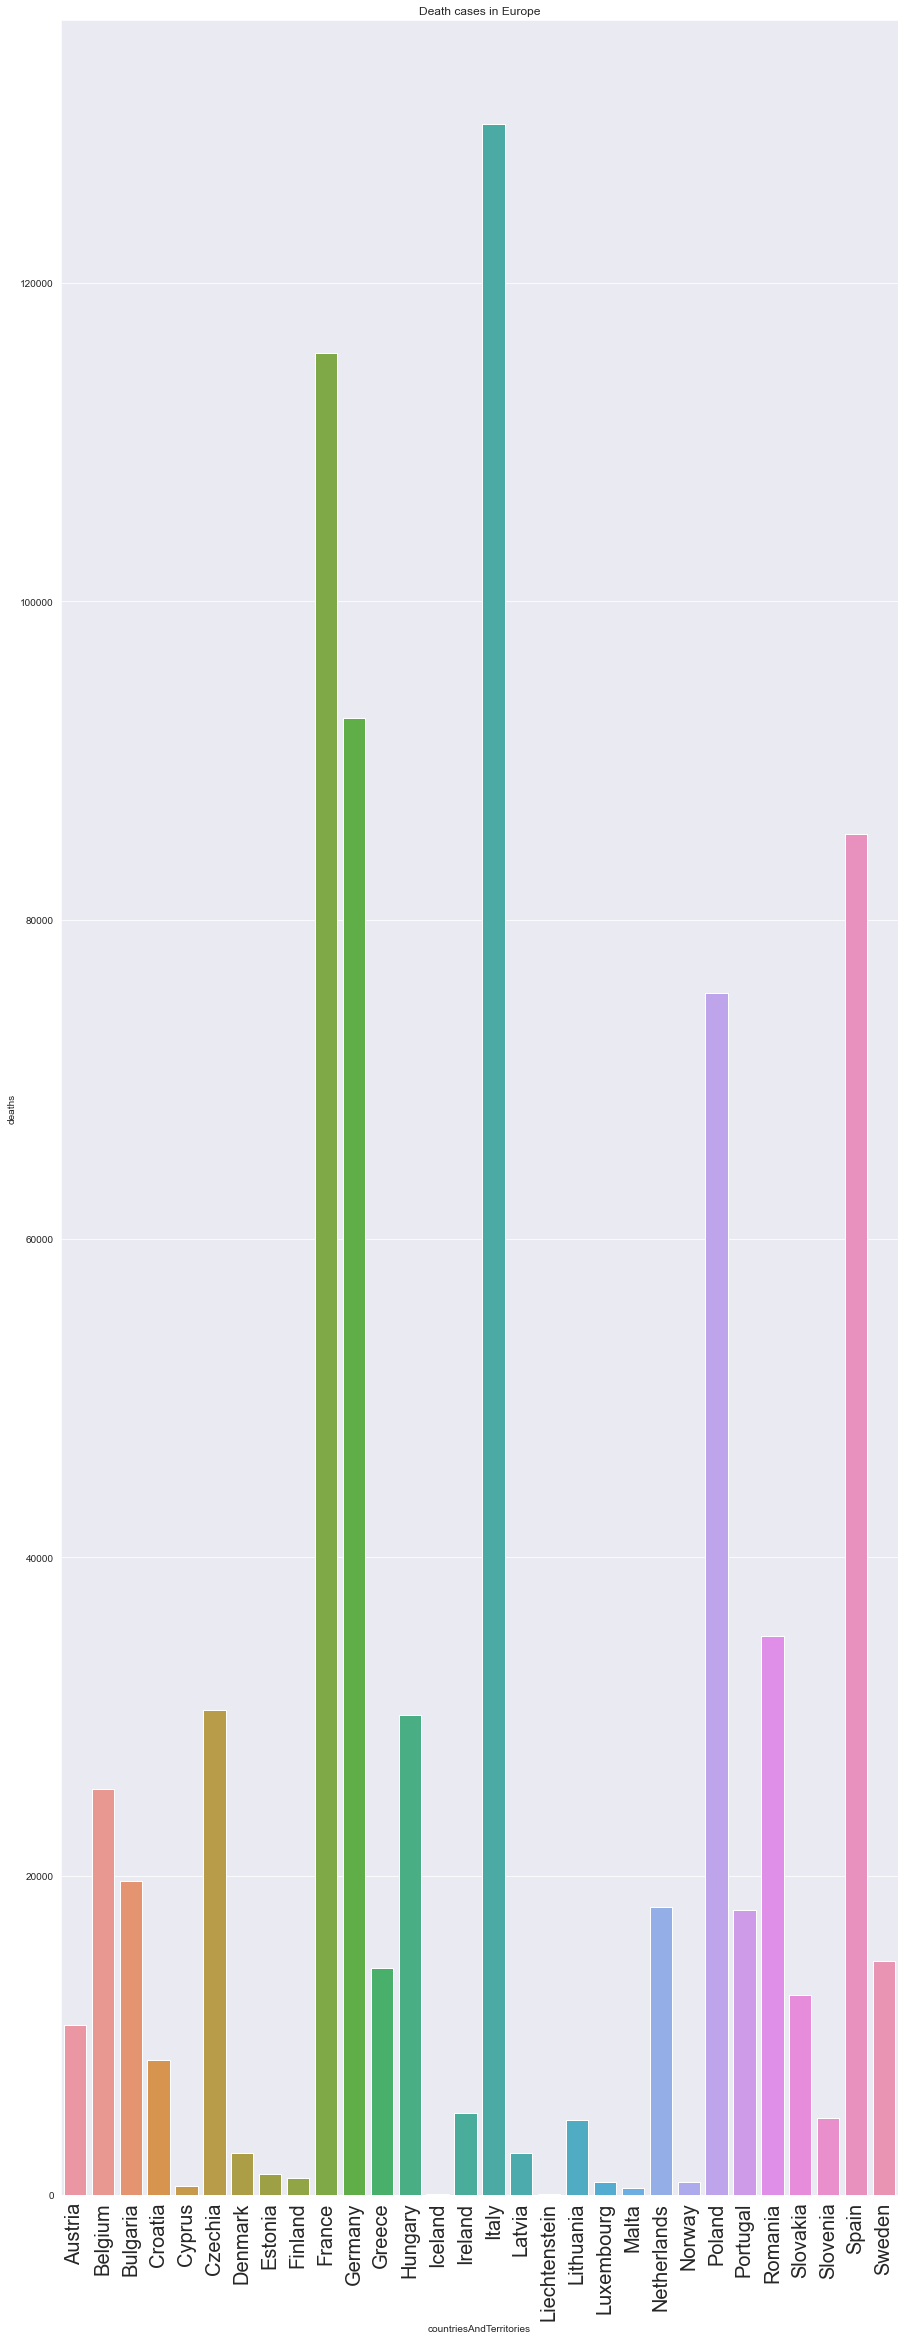

In [9]:
#Covid:Deaths reported in EU
data_death=covid_data.groupby("countriesAndTerritories")[['deaths']].sum().reset_index()
# print (data_death)

plt.figure(figsize=(15,40))
sns.barplot(x=data_death["countriesAndTerritories"], y=data_death["deaths"])
plt.yticks(size=10)
plt.xticks(size=20)
plt.title("Death cases in Europe");
plt.xticks(rotation=90)
plt.show()



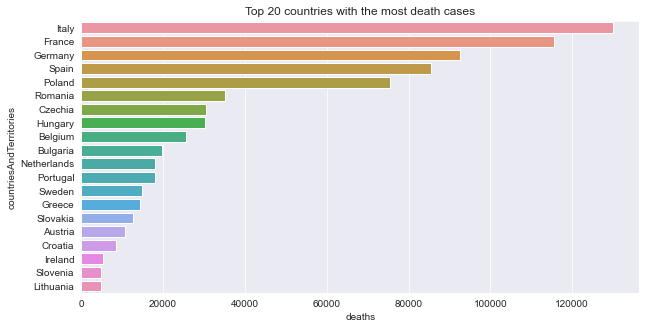

In [10]:
#Top 20 Deaths
death = data_death.sort_values(by="deaths", ascending=False)       # Creating a dataframe of top 20 countries.
death_top20 = death.head(20)
death_top20
#
plt.figure(figsize=(10,5))
sns.barplot(x=death_top20["deaths"], y=death_top20["countriesAndTerritories"])
plt.title("Top 20 countries with the most death cases")
plt.show()


In [24]:
# Covid 19 :EU Visualize Timeseries ()
group_eu1 = covid_data.groupby(['dateRep', 'countriesAndTerritories'])['cases','deaths'].sum().reset_index()
#group_eu1['dateRep'] = pd.to_datetime(covid_data['dateRep'])
group_eu1 = covid_data.sort_values('dateRep', ascending=True)
group_eu1['dateRep'] = group_eu1['dateRep'].dt.strftime('%m-%d-%Y')
#group_eu1['dateRep'] = group_eu1['dateRep'].dt.strftime('%Y-%m-%d')

eu_copy = group_eu1.copy()
fig = px.scatter_geo(eu_copy, locations="countriesAndTerritories", locationmode='country names',
                     color="cases", hover_data=["countriesAndTerritories",'deaths'],
                     range_color= [0, 2000],
                     projection="natural earth", animation_frame="dateRep", scope="europe",
                     title='COVID-19: Cases and Deaths Over Time in Europe', color_continuous_scale="spectral", height=750)
fig.show()

In [15]:
# # Covid19 - Ireland
data_Ireland=covid_data[(covid_data['countriesAndTerritories'] == "Ireland")][['countriesAndTerritories', 'dateRep', 'cases', 'deaths']].sort_values('dateRep', ascending=True)
data_Ireland['dateRep'] = data_Ireland['dateRep'].dt.strftime('%m-%d-%Y')
#
print(data_Ireland)
#
# #Cases Reported in Ireland
Ireland_cases = data_Ireland['cases'].groupby(data_Ireland['dateRep']).sum().sort_values(ascending=True)
# #print(Ireland_cases)



     countriesAndTerritories     dateRep   cases  deaths
2969                 Ireland  01-03-2021  219503    4319
2938                 Ireland  01-04-2021     411       6
2908                 Ireland  01-05-2021     541       4
2877                 Ireland  01-06-2021     363       0
2847                 Ireland  01-07-2021     413       9
2816                 Ireland  01-08-2021    1426       0
2785                 Ireland  01-09-2021    1533       0
2968                 Ireland  02-03-2021     685       0
2937                 Ireland  02-04-2021     749      18
2907                 Ireland  02-05-2021     569       3
2876                 Ireland  02-06-2021     315       0
2846                 Ireland  02-07-2021     431       2
2815                 Ireland  02-08-2021    1285       0
2784                 Ireland  02-09-2021    1706      20
2967                 Ireland  03-03-2021     358      14
2936                 Ireland  03-04-2021     587       8
2906                 Ireland  0

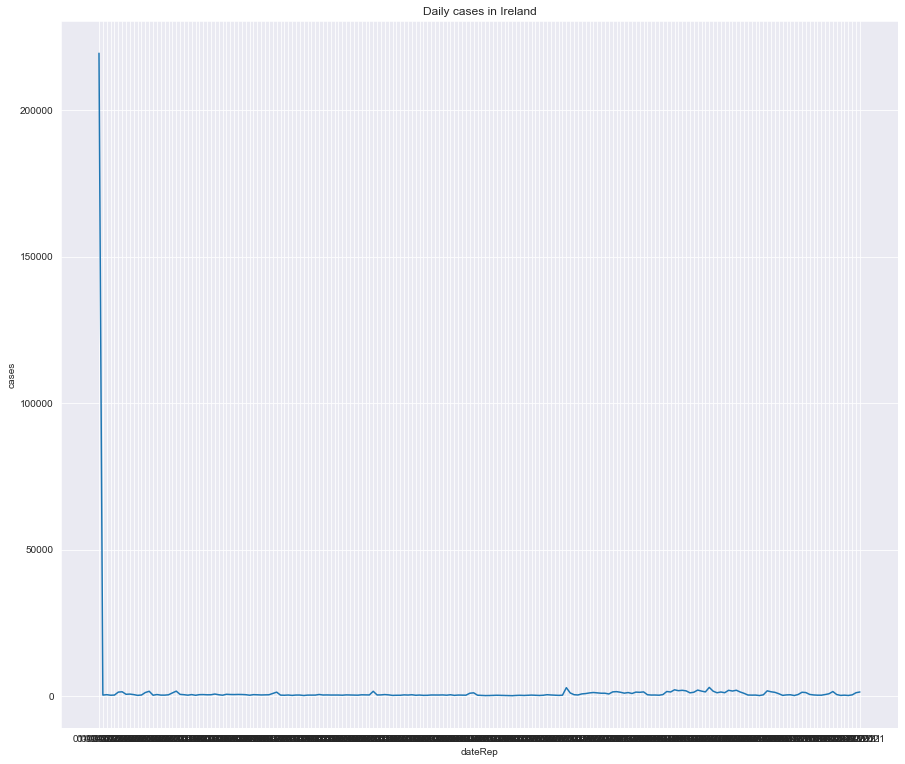

In [16]:
# # Cases in Ireland based in date reported
plt.figure(figsize=(15,13))
sns.lineplot(x=data_Ireland.dateRep, y=data_Ireland.cases)
plt.xlabel("dateRep")
plt.ylabel("cases")
plt.title('Daily cases in Ireland');
plt.show()
# #
# #



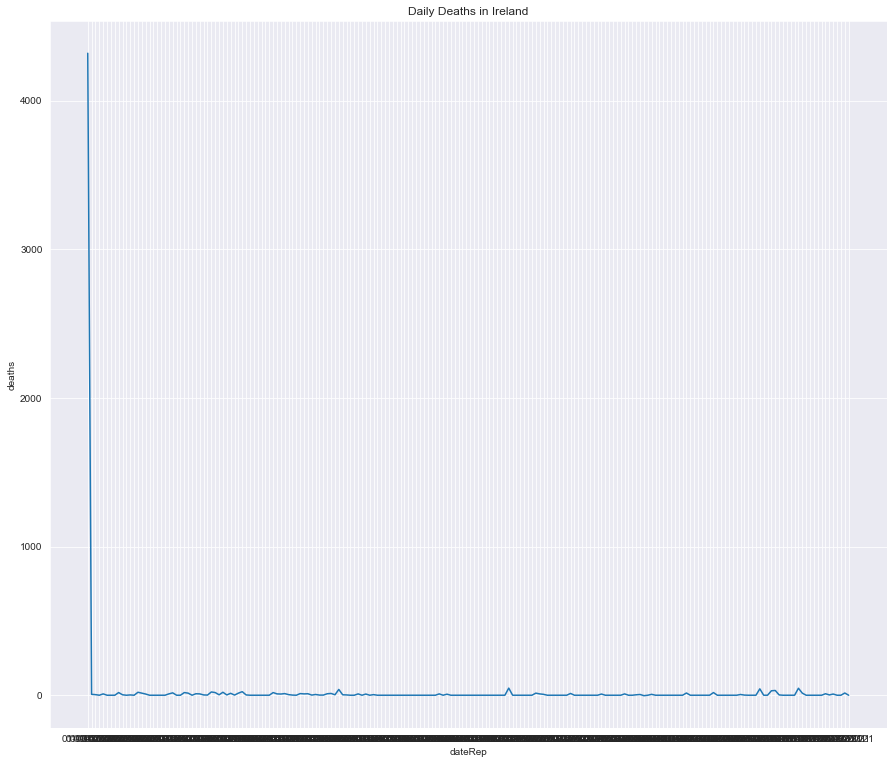

In [18]:
# # #Death Reported in Ireland
Ireland_deaths = data_Ireland['deaths'].groupby(data_Ireland['dateRep']).sum().sort_values(ascending=True)
#print(Ireland_deaths)

plt.figure(figsize=(15,13))
sns.lineplot(x=data_Ireland.dateRep, y=data_Ireland.deaths)
plt.xlabel("dateRep")
plt.ylabel("deaths")
plt.title('Daily Deaths in Ireland');
plt.show()


In [19]:
# #Covid 19 Ire: Cases & Deaths
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_Ireland['dateRep'],
                         y=data_Ireland['cases'],
                         mode='lines+markers',
                         name='Cases',
                         line=dict(color='blue', width=2)
                        ))
fig.add_trace(go.Scatter(x=data_Ireland['dateRep'],
                         y=data_Ireland['deaths'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='Red', width=2)
                        ))

fig.update_layout(
    title=' Covid-19 Ireland - Cases And Deaths ',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)
fig.show()
#
#
#
#


In [20]:
# #Ireland mortality_over_time
mortality_over_time = round((Ireland_cases / Ireland_deaths) * 100, 2)

index = mortality_over_time.index
data = mortality_over_time

fig = go.Figure(data=[

    go.Line(name='Mortality in %'
    ,x=index
    ,y=data
    ,mode="lines+markers")

])

fig['layout'].update(
    title="Covid-19:Ireland Mortality rate over the time"
    , title_x=0.5
    , xaxis_title='month'
    , yaxis_title='Mortality rate (deaths/cases) in Percentage'
)

fig.show()
#


C:\Users\aruna\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [21]:
# # Spain mortality
data_Spain=covid_data[(covid_data['countriesAndTerritories'] == "Spain")][['countriesAndTerritories', 'dateRep', 'cases', 'deaths']].sort_values('dateRep', ascending=True)
data_Spain['dateRep'] = data_Spain['dateRep'].dt.strftime('%m-%d-%Y')
Spain_cases = data_Spain['cases'].groupby(data_Spain['dateRep']).sum().sort_values(ascending=True)
Spain_deaths = data_Spain['deaths'].groupby(data_Spain['dateRep']).sum().sort_values(ascending=True)
# #
mortality_over_time = round((Spain_cases / Spain_deaths) * 100, 2)

index = mortality_over_time.index
data = mortality_over_time

fig = go.Figure(data=[

    go.Line(name='Mortality in %'
    ,x=index
    ,y=data
    ,mode="lines+markers")

])

fig['layout'].update(
    title="Covid 19: Spain Mortality rate over the time"
    , title_x=0.5
    , xaxis_title='month'
    , yaxis_title='Spain - Mortality rate (deaths/cases) in Percentage')

fig.show()
#
#
#
#
#
#


In [22]:
# #Covid 19: Ireland and Spain Cases
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("Ireland", "Spain"))

fig.add_trace(go.Scatter(x=data_Ireland['dateRep'], y=data_Ireland['cases'],
                    marker=dict(color=data_Ireland['cases'], coloraxis="coloraxis")),
              1, 1)

fig.add_trace(go.Scatter(x=data_Spain['dateRep'], y=data_Spain['cases'],
                    marker=dict(color=data_Spain['cases'], coloraxis="coloraxis")),
              1, 2)


fig.update_layout(coloraxis=dict(colorscale='RdBu'), showlegend=False,title_text="Trend of Covid-19 Cases In Ireland and Spain ")
fig.update_layout(plot_bgcolor='rgb(254,224,144)')
fig.show()




In [23]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("Ireland", "Spain"))

fig.add_trace(go.Scatter(x=data_Ireland['dateRep'], y=data_Ireland['deaths'],
                    marker=dict(color=data_Ireland['deaths'], coloraxis="coloraxis")),
              1, 1)

fig.add_trace(go.Scatter(x=data_Spain['dateRep'], y=data_Spain['deaths'],
                    marker=dict(color=data_Spain['deaths'], coloraxis="coloraxis")),
              1, 2)


fig.update_layout(coloraxis=dict(colorscale='RdBu'), showlegend=False,title_text="Trend of Covid-19 Deaths in Ireland and Spain")
fig.update_layout(plot_bgcolor='rgb(253,174,97)')
fig.show()
